In [83]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,chi2,f_oneway,t

In [84]:
tienda = pd.read_csv(r"C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Desktop\Analisis_datos_eda\data\processed\Merch_processed.csv")

In [85]:
df = tienda.copy()

In [86]:
plt.style.use('ggplot')

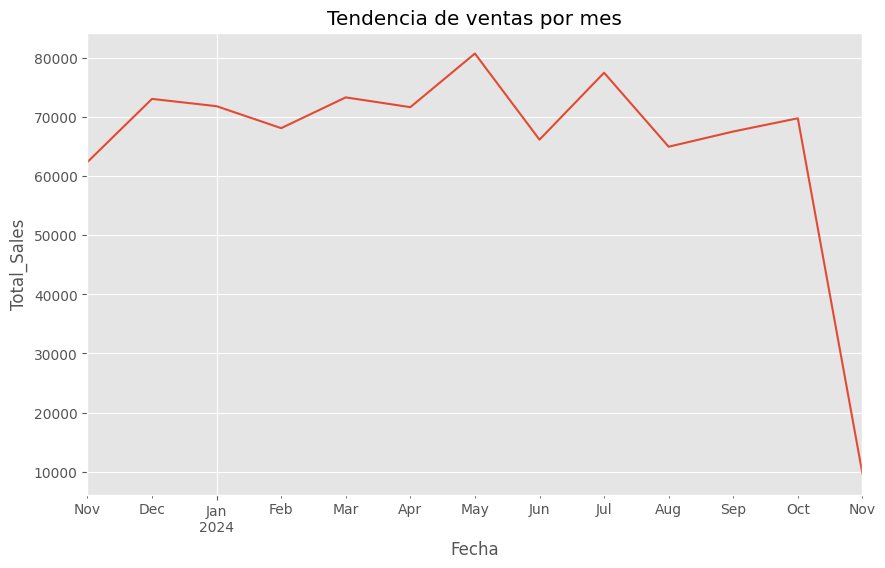

In [87]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
plt.figure(figsize=(10, 6))
df.set_index('Order_Date').resample('ME')['Total_Sales'].sum().plot()
plt.title('Tendencia de ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Total_Sales')
plt.show();

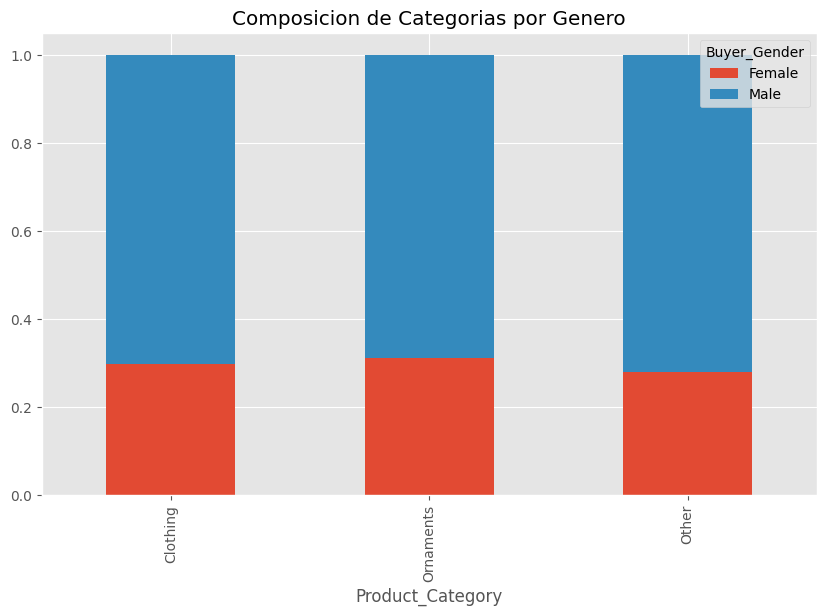

In [88]:
pd.crosstab(df['Product_Category'], df['Buyer_Gender'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title("Composicion de Categorias por Genero")
plt.show()

Podemos concluir con el anterior grafico que el genero masculino realiza mas ordenes en loa 3 productos.

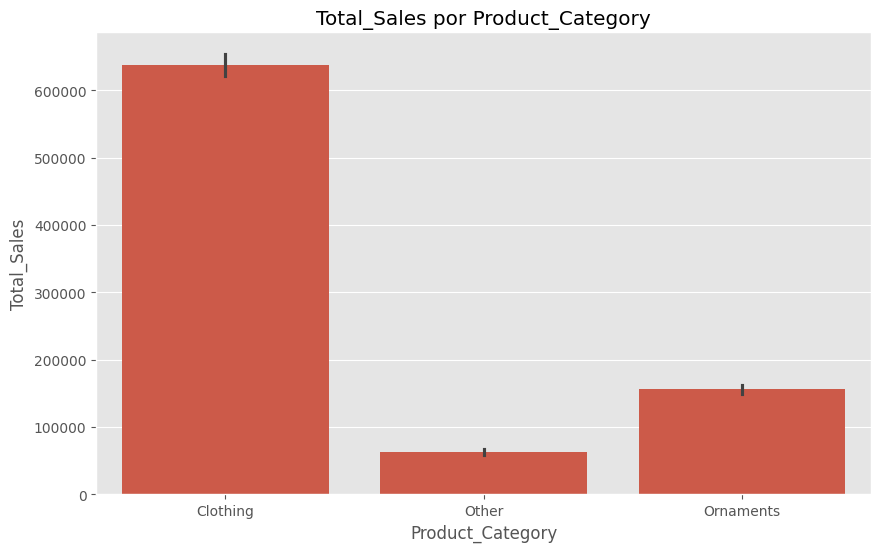

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Total_Sales', data=df, estimator=sum)
plt.title('Total_Sales por Product_Category')
plt.show()

Podemos concluir con el anterior grafico que el producto que mas genera ventas es 'CLOTHING'.

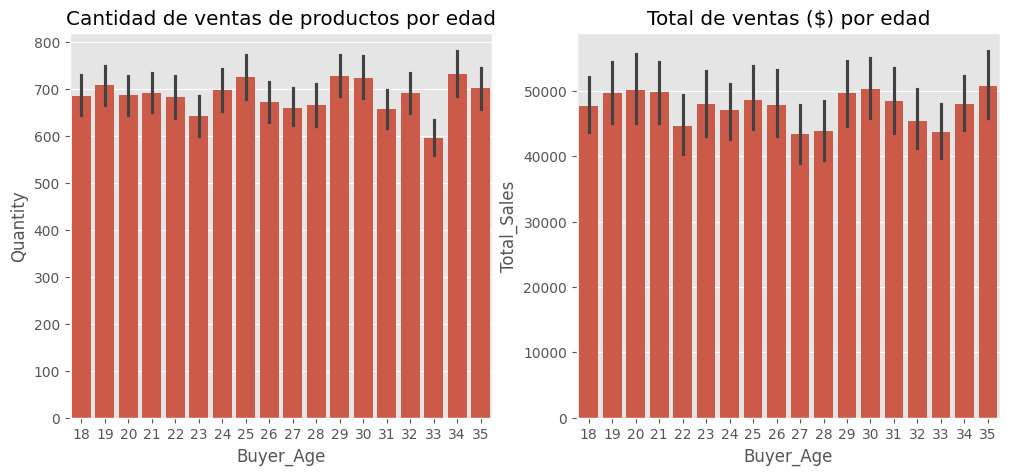

<Figure size 640x480 with 0 Axes>

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(ax=axes[0],x='Buyer_Age', y='Quantity', data=df, estimator=sum)
axes[0].set_title('Cantidad de ventas de productos por edad')
sns.barplot(ax=axes[1],x='Buyer_Age', y='Total_Sales', data=df, estimator=sum)
axes[1].set_title('Total de ventas ($) por edad')
plt.show()
plt.tight_layout();

No vemos mucha diferencia en la venta de productos en base a la edad teniendo en cuenta las cantidades de productos, ni tampoco en dinero gastado.

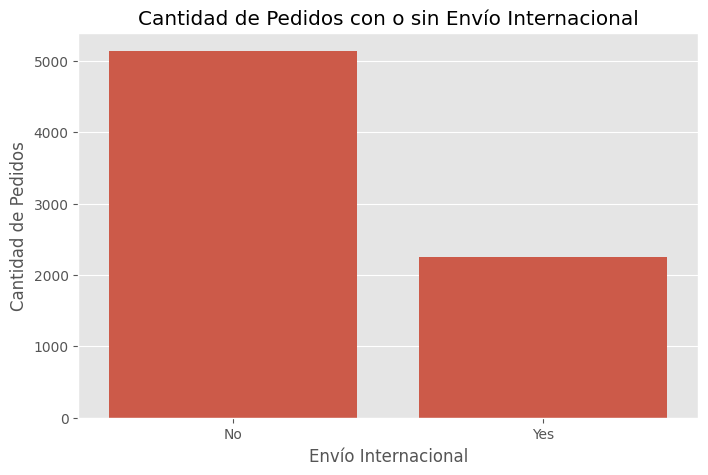

In [ ]:
envios = df['International_Shipping'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=envios.index, y=envios.values)
plt.title('Cantidad de Pedidos con o sin Envio Internacional')
plt.xlabel('Envio Internacional')
plt.ylabel('Cantidad de Pedidos')
plt.show()

Observamos que mas de 5000 pedidos no necesitaron envios internacionales, por lo que las mayorias de compras son locales.

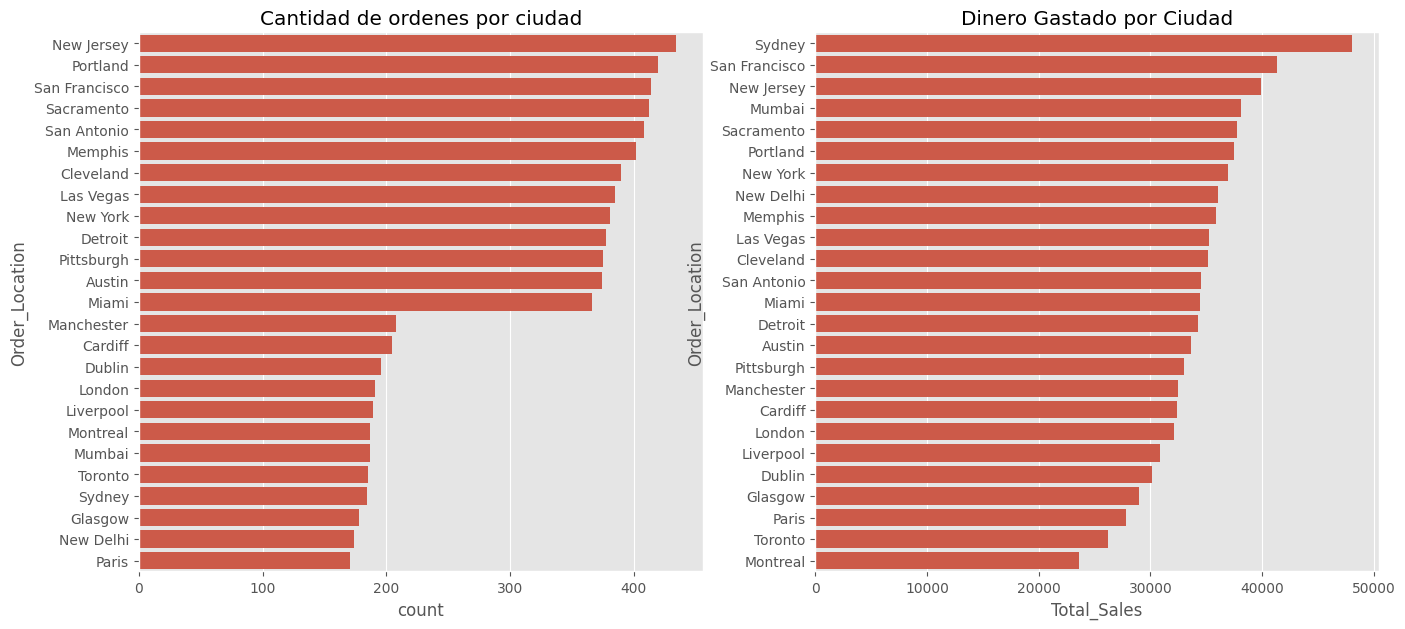

<Figure size 640x480 with 0 Axes>

In [135]:
c = df.groupby('Order_Location')['Total_Sales'].sum().reset_index()
c = c.sort_values(by='Total_Sales', ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.countplot(ax=axes[0],y='Order_Location', data=df, order=df['Order_Location'].value_counts().index)
axes[0].set_title('Cantidad de ordenes por ciudad')
sns.barplot(ax=axes[1],y='Order_Location',x='Total_Sales',data=c)
axes[1].set_title('Dinero Gastado por Ciudad')
plt.show()
plt.tight_layout();

En los dos graficos mostrados anteriormente observamos que en la cantidad de ordenes por ciudad, la mayor es New Jersey y la menor Paris. Curiosamente el orden cambia cuando miramos el dinero generado por ciudad, en este caso la ciudad que mas dinero genero fue Sydney y la que menos Montreal.

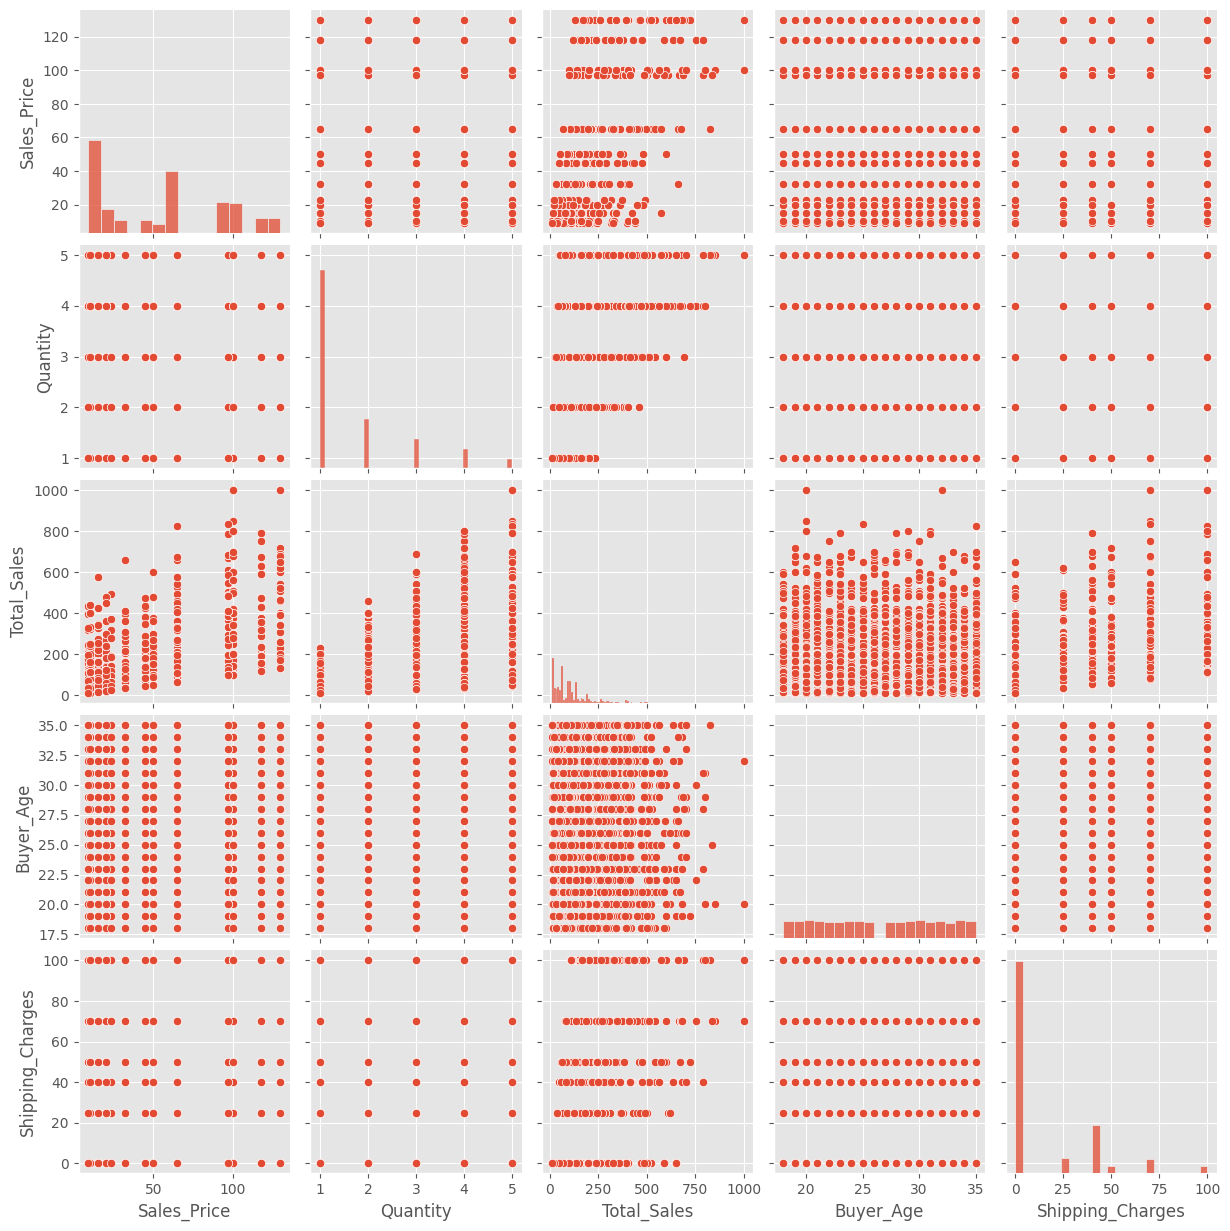

In [96]:
sns.pairplot(df[['Sales_Price', 'Quantity', 'Total_Sales', 'Buyer_Age','Shipping_Charges']])
plt.show()

PairPlot de algunas de las variables numericas.

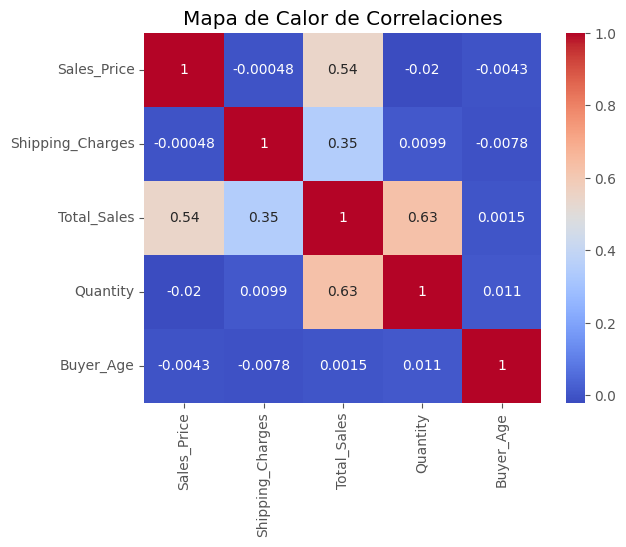

In [100]:
co = df[['Sales_Price', 'Shipping_Charges', 'Total_Sales', 'Quantity','Buyer_Age']].corr()
sns.heatmap(co, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()


En el mapa de correlacion podemos ver cosas interensantes, como que Total_Sales tiene una alta relacion con Quantity. Y como hemos visto anteriormente no hay ninguna relacion entre las ventas totales, cantidad etc. con la edad del comprador.

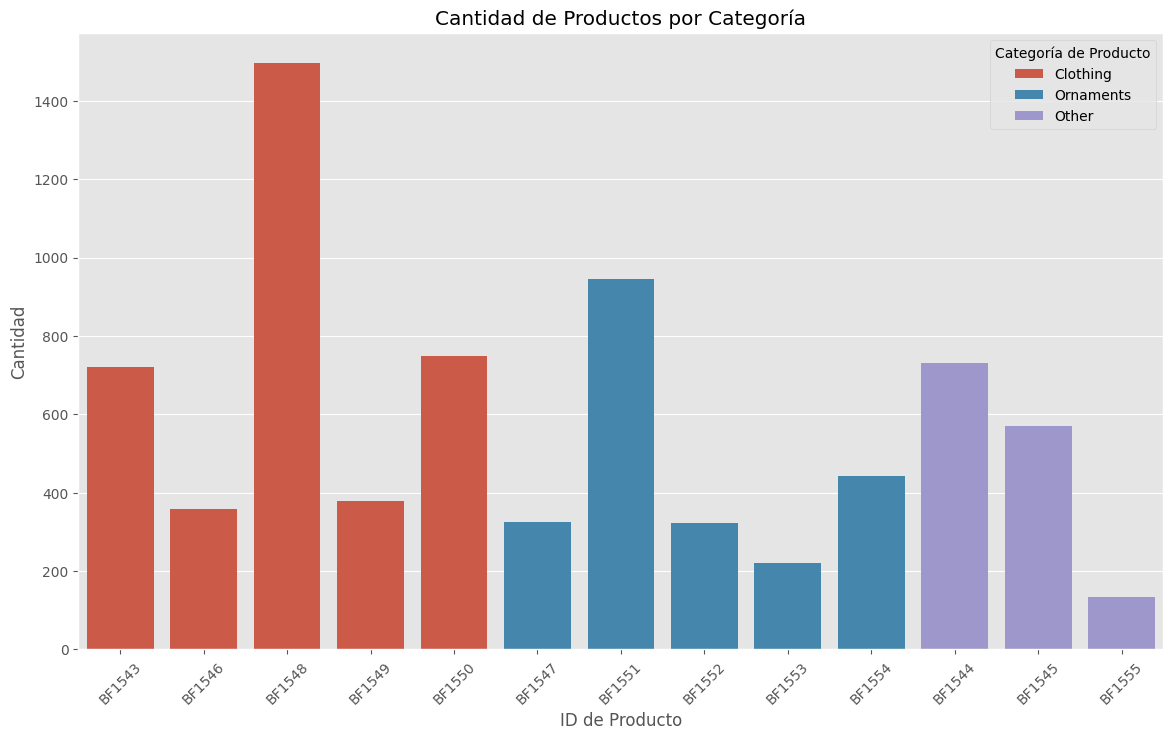

In [111]:
grouped_data = df.groupby(['Product_Category', 'Product_ID']).size().reset_index(name='Counts')
plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data, 
    x='Product_ID', 
    y='Counts', 
    hue='Product_Category', 
    dodge=False
)
plt.title('Cantidad de Productos por Categoría')
plt.xlabel('ID de Producto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas para legibilidad
plt.legend(title='Categoría de Producto')
plt.show()

Podemos obsrvar que el producto 'BF1549' ha sido el mas vendido y 'BF1553' el que menos.

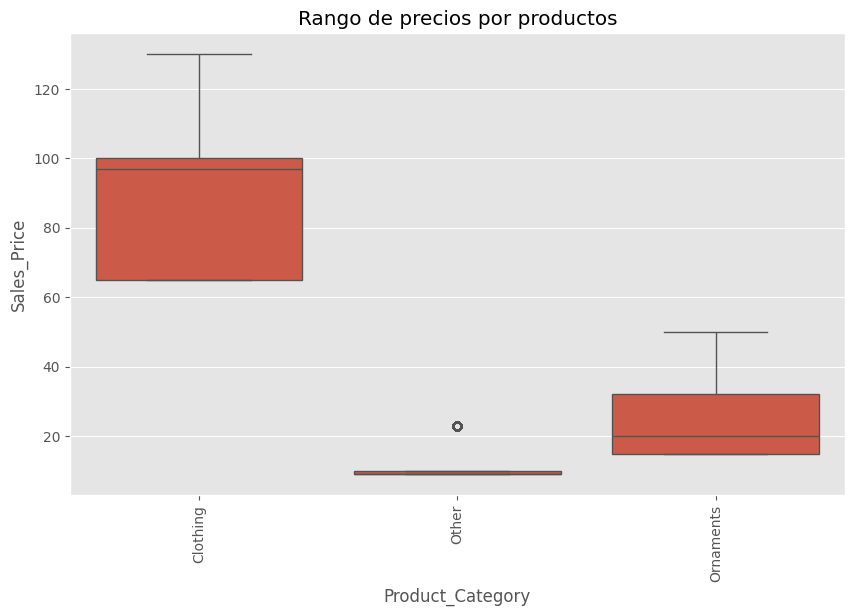

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(df,x='Product_Category', y='Sales_Price')
plt.xticks(rotation=90)
plt.title('Rango de precios por productos')
plt.show()

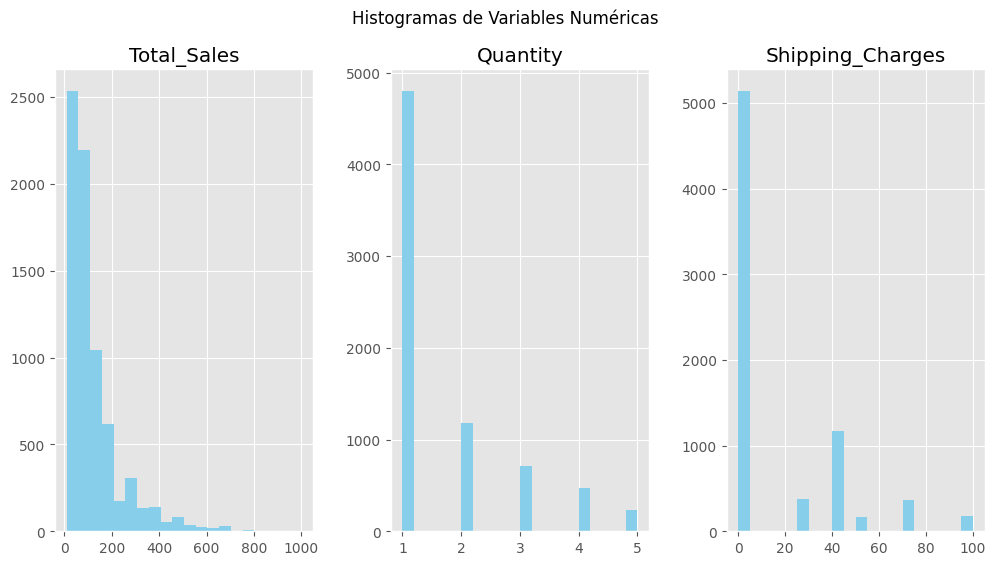

In [ ]:
df[['Total_Sales', 'Quantity','Shipping_Charges']].hist(bins=20, figsize=(12, 6), layout=(1, 3), color='skyblue')
plt.suptitle('Histogramas de Variables Numericas')
plt.show()


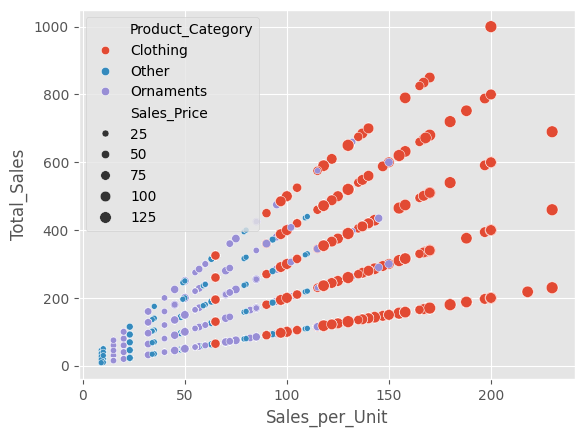

In [119]:
sns.scatterplot(data=df, x='Sales_per_Unit', y='Total_Sales', hue='Product_Category',size='Sales_Price')
plt.show()

Los productos de la categoria 'CLOTHING' generan las ventas más significativas, tanto en Sales_per_Unit como en Total_Sales. El precio por unidad y la cantidad parecen ser factores clave que afectan las ventas totales. Los productos mas caros tienen un impacto visible en las ventas totales independientemente de la categoría.

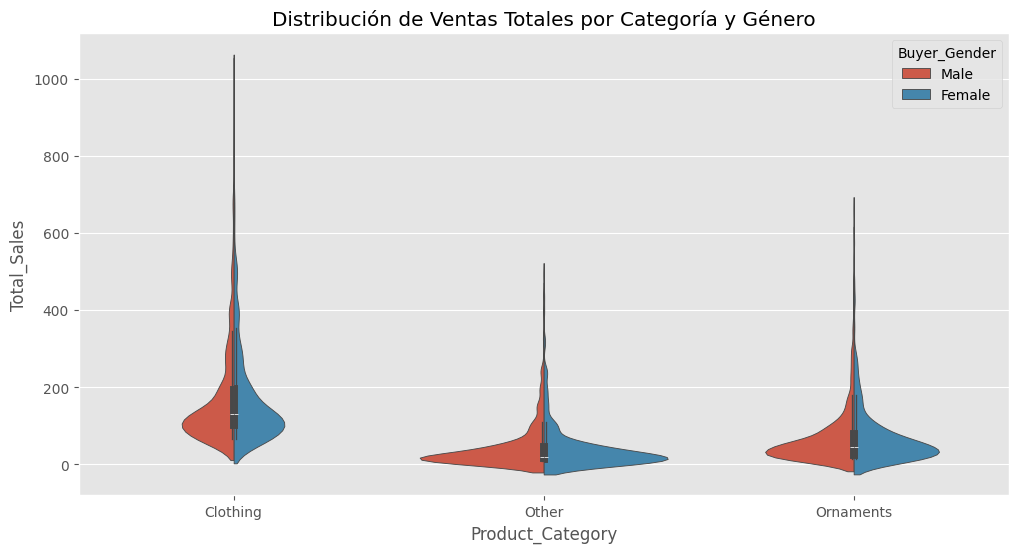

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Product_Category', y='Total_Sales', data=df, hue='Buyer_Gender', split=True)
plt.title('Distribución de Ventas Totales por Categoría y Género')
plt.show()


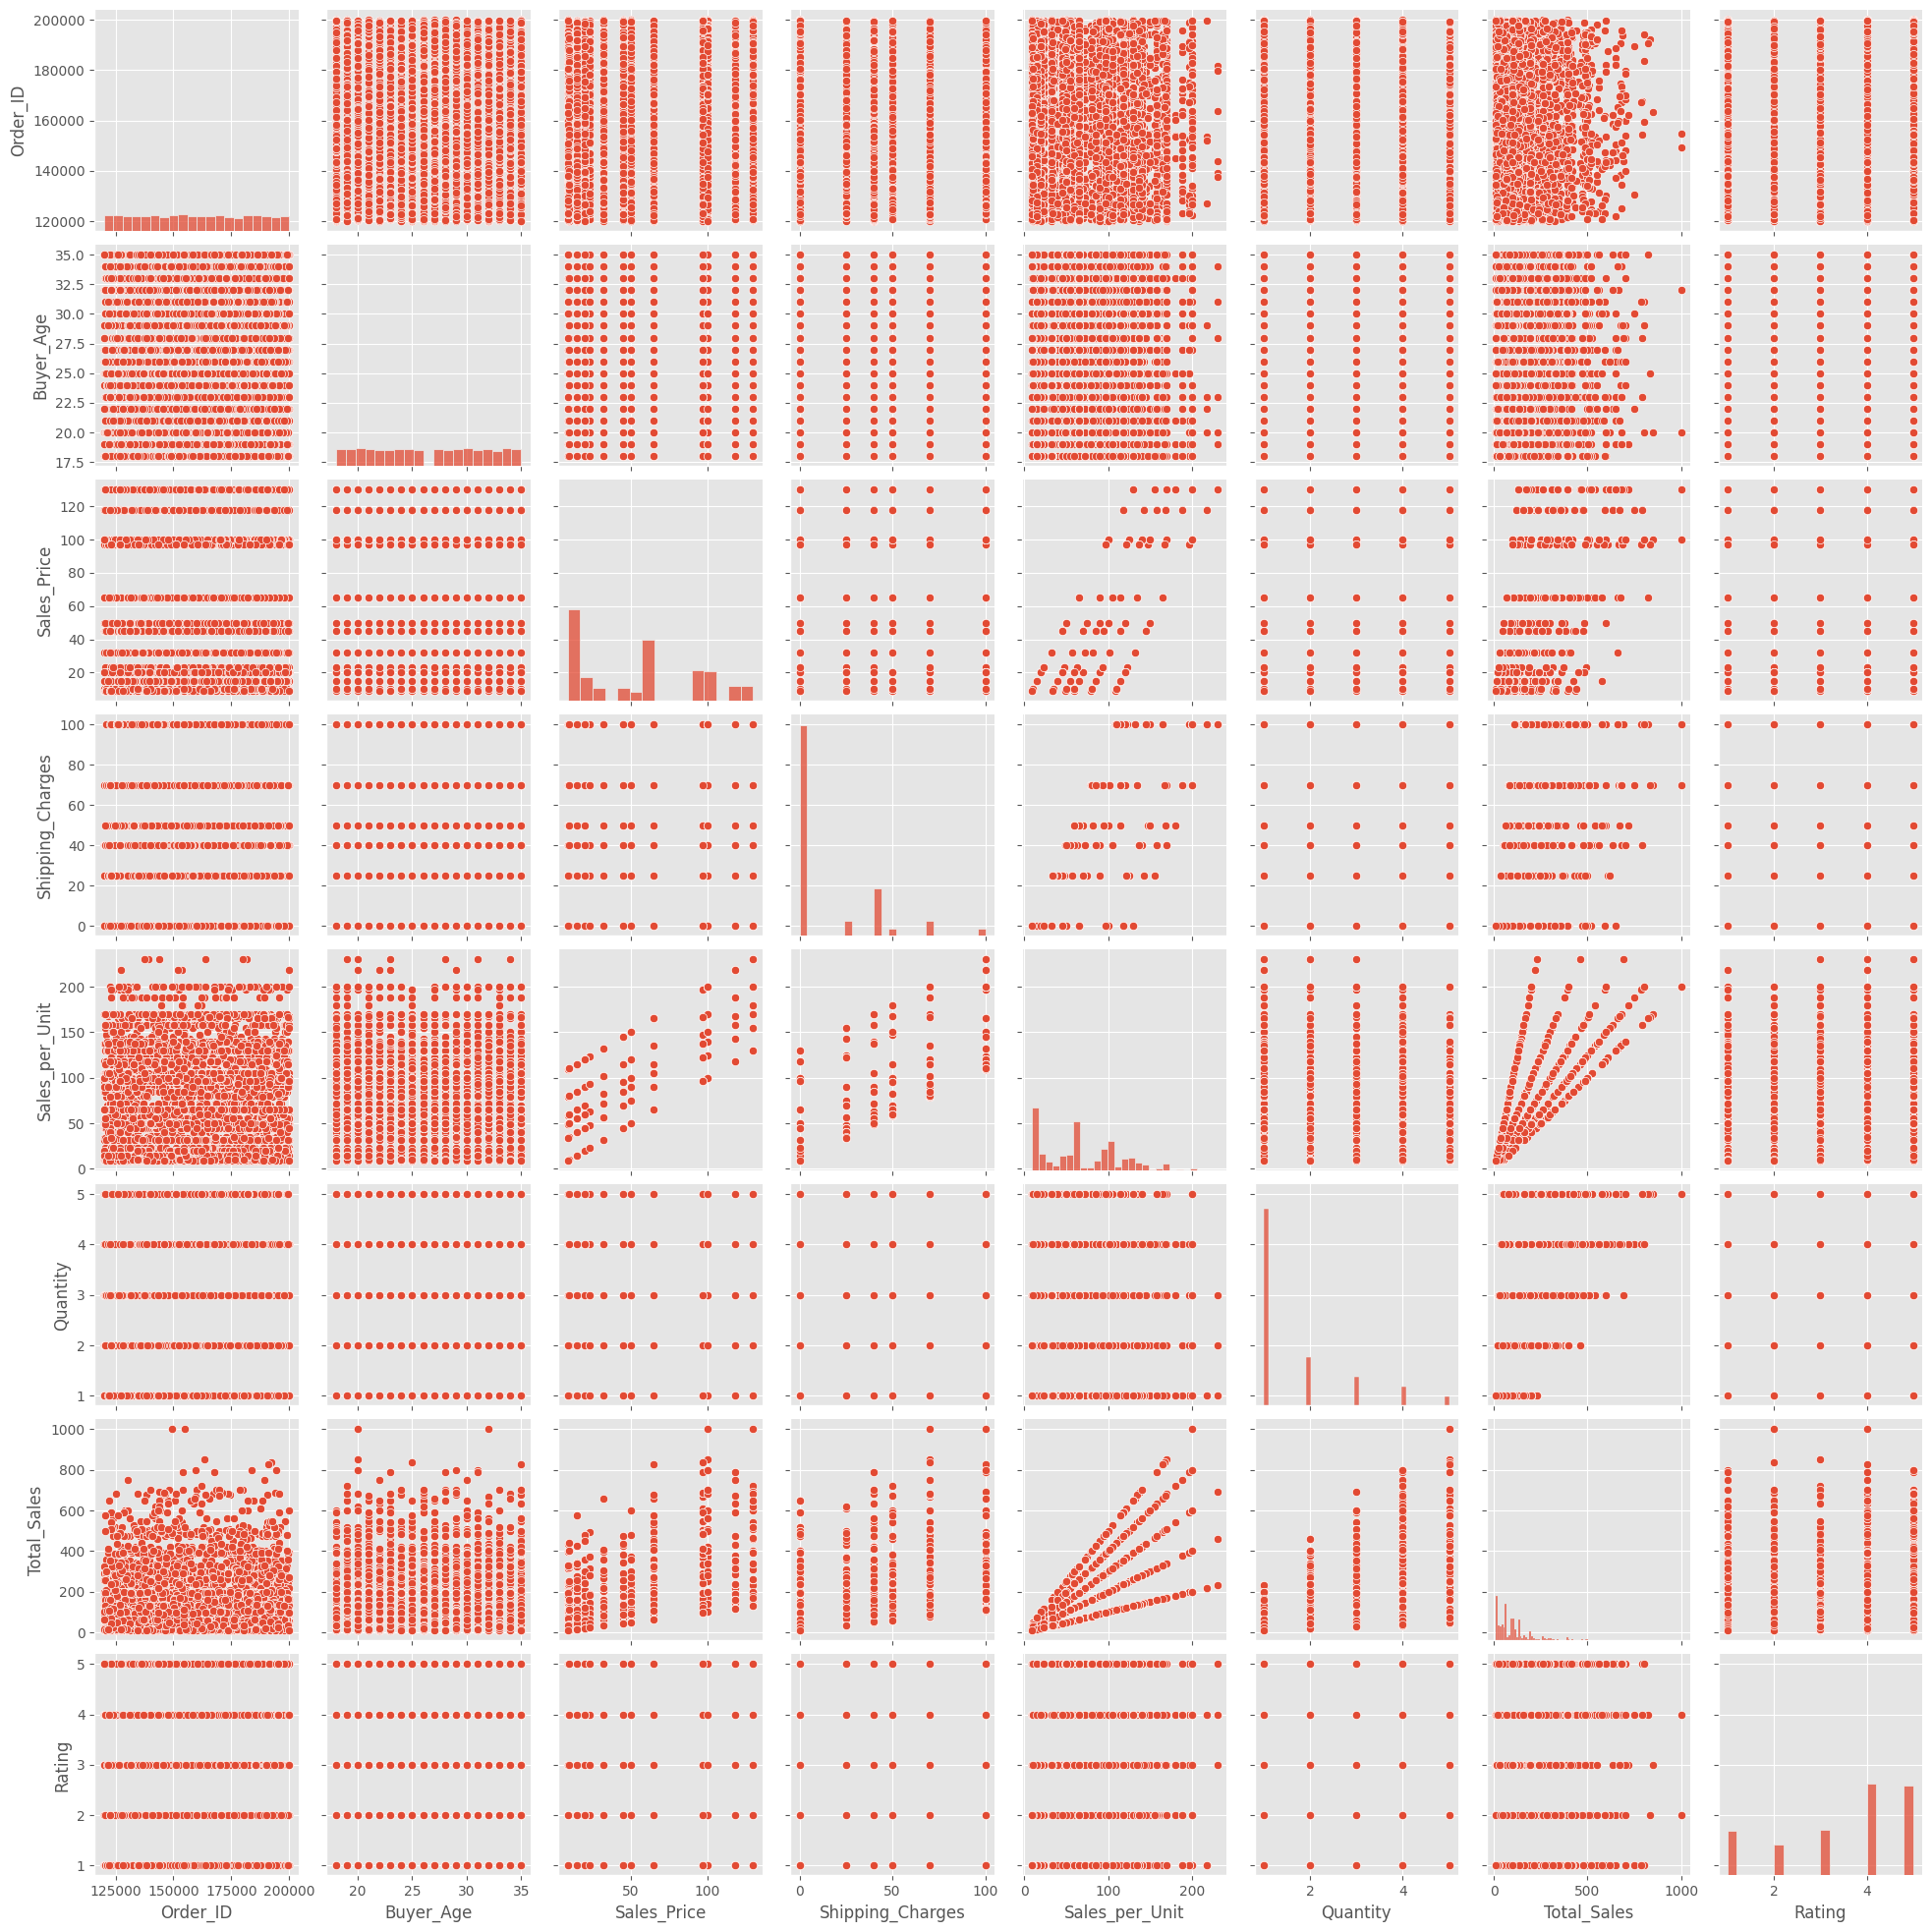

In [105]:
sns.pairplot(df) 